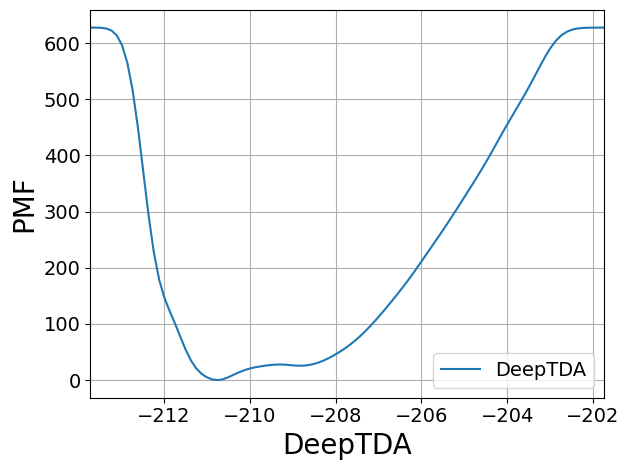

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

def marginalize(free):    
    # Filter data based on conditions
    free = free.reshape(51,51)
    
    # Calculate free energies
    free = -2.49 * np.logaddexp.reduce(-1 / 2.49 * free, 0)
    return free
    
def plot(method, fes_dir):
    pmfs = []
    # Iterate through all subdirectories
    for seed in range(1):
        file = os.path.join(fes_dir, str(seed), "fes/100.dat")
    
        # Load data from the file
        data = np.loadtxt(file, comments='#')
        
        with open(file, 'r') as file:
            first_line = file.readline().strip()
            
        keys = first_line.split()[2:]

        cv_idx = keys.index(cv_name[method])
        free_idx = keys.index('file.free')
        cv = data[:, cv_idx]
        free = data[:, free_idx]
        if method == 'ref':
            free = marginalize(free)
            cv = np.arange(-np.pi, np.pi, 2*np.pi/51)

        pmfs.append(free)
        
    pmfs = np.array(pmfs)
    mean_pmf = np.mean(pmfs, axis=0)
    mean_pmf = mean_pmf - mean_pmf.min()
    std_pmf = np.std(pmfs, axis=0)

    plt.plot(cv, mean_pmf, label=method)
    plt.fill_between(cv, mean_pmf - std_pmf, mean_pmf + std_pmf, alpha=0.2)

    plt.xlabel(method, fontsize=20, fontweight="medium")
    plt.ylabel('PMF', fontsize=20, fontweight="medium")
    plt.legend(fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlim(cv.min(), cv.max())
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'../figures/pmf_{method}.png', dpi=300, bbox_inches="tight")
    plt.savefig(f'../figures/pmf_{method}.pdf', dpi=300, bbox_inches="tight")
    plt.show()

ns = '10'

cv_name = {
    'phi': 'phi',
    'ref': 'phi',
    'DeepTDA': 'deep.node-0',
    'DeepLDA': 'deep.node-0',
    'DeepTICA': 'deep.node-0',
    'AE': 'deep.node-0',
    'TAE': 'deep.node-0',
    'VDE': 'deep.node-0',
}
method = 'phi'
# method = 'ref'
# method = 'DeepLDA'
# method = 'DeepTDA'
# method = 'DeepTICA'
# method = 'AE'
# method = 'TAE'
# method = 'VDE'

base_dir = f'/home/guest_sky/geodesic-interpolation-cv/simulations/aldp/{method}/{ns}/log'
date = sorted(os.listdir(base_dir))[-1]
fes_dir = os.path.join(base_dir, date)
plot(method, fes_dir)